# **Project Name**    -  Seoul Bike Sharing Demand Prediction


##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

First we import the necessary libraries and look at our data and its characteristics. We have a dataset of 8760 rows and 14 columns with no duplicate/missing data. Next we study the features thoroughly and the data it represents. We first see that the column 'Date' is in 'object' datatype, and we convert it to datetime datatype. Later from the date column, we extract, 'Date', 'month', 'year' and number of week, We drop the date column and we rename columns for convinence.

We ploted various charts and explored usefull insites. Based on our visualizations, we formulate 3 hypothetical statements and perform hypothesis tests. The statements are:

The average bike count in Seoul city at any point of time is greater than 100.

The average temperature in Seoul city at any point is grater than 10 degree Celsius.

The Standard deviation of humdidity in Seoul city is 20.

Furthur, we performed one hot encoding on our categorical features with dropping the first column being true. We found out during visualization that our dependant variable, 'Rented_bike_count' was right skewed, hence to overcome this we applied a squareroot transformation to get a normal distribution. Next we scaled our data using MinMax scaler. Finally we split our data into train and test in 80-20 ratio. The data was ready to fit into a machine learning model, we implemented the various models and calculated the various stastical parameters for the performance

Finally, we see that the bike rental company can deploy a machine learning model that uses Random Forest Regressor to predict the demand for city bikes for a particular hour, which can help the company meet the demand accurately.

# **GitHub Link -**

Provide your GitHub Link here. :

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [185]:
# importing important modules for our project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from pandas.core.groupby import groupby
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
# Load Dataset
path='/content/drive/MyDrive/SeoulBikeData.csv'
data = pd.read_csv(path, encoding='unicode_escape')
df=pd.DataFrame(data)

### Dataset First View

In [188]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [189]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [190]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [191]:
# Dataset Duplicate Value Count
duplicates =len(df[df.duplicated()])
print(duplicates)

0


#### Missing Values/Null Values

In [192]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

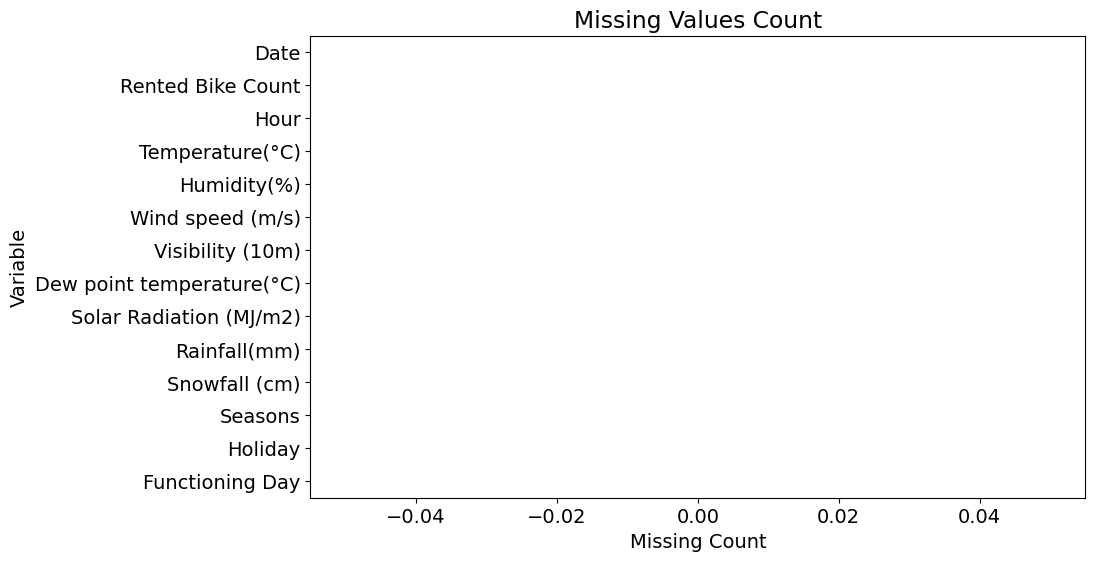

In [193]:
# Visualizing the missing values
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Variable', 'Missing Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Count', y='Variable', data=missing_data, palette='viridis')
plt.title('Missing Values Count')
plt.xlabel('Missing Count')
plt.ylabel('Variable')
plt.show()


### What did you know about your dataset?

From the above dataset we can see that, there are 14 columns and 8760 rows and The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. The dataset have zero null values and also zero Duplicate Value Count.

## ***2. Understanding Your Variables***

In [194]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [195]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description

Date - has information about date in format year-month-day

Rented Bike count - information about Count of bikes rented at each hour

Hour - Hour of the day (0 to 23)

Temperature - Temperature in Celsius

Humidity - humidity with respect to the given hour on the given date (in %)

Windspeed - Windspeed with respect to the given hour on the given date (in m/s)

Visibility - Visibility with respect to the given hour on the given date (upto 10m)

Dew point temperature - Dew point temperature with respect to the given hour on the given date (in Celsius)

Solar radiation - Solar Radition with respect to the given hour on the given date (in MJ/m2)

Rainfall - Rainfall with respect to the given hour on the given date (in mm)

Snowfall - Snowfall with respect to the given hour on the given date (in cm)

Seasons - various seasons that is "Winter, Spring, Summer, Autumn"

Holiday - if it was holiday or not, namely "Holiday" and "No holiday"

Functional Day - shows if the hours were functional or not, No for Non Functional Hours and Yes for Functional hours

### Check Unique Values for each variable.

In [196]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("Number of unique values in ",i,"is",df[i].nunique(),".")

Number of unique values in  Date is 365 .
Number of unique values in  Rented Bike Count is 2166 .
Number of unique values in  Hour is 24 .
Number of unique values in  Temperature(°C) is 546 .
Number of unique values in  Humidity(%) is 90 .
Number of unique values in  Wind speed (m/s) is 65 .
Number of unique values in  Visibility (10m) is 1789 .
Number of unique values in  Dew point temperature(°C) is 556 .
Number of unique values in  Solar Radiation (MJ/m2) is 345 .
Number of unique values in  Rainfall(mm) is 61 .
Number of unique values in  Snowfall (cm) is 51 .
Number of unique values in  Seasons is 4 .
Number of unique values in  Holiday is 2 .
Number of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [197]:
# Write your code to make your dataset analysis ready.

# importing the datatime module
import datetime as dt

# convert the "date" column into 3 different columns i.e "year","month","day".
df['date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

# Creating the new column 'year','month','day' from 'date' column.
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day_name()

#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['week']=df['day'].apply(lambda x : "weekend" if x=='Saturday' or x=='Sunday' else "weekday" )

# Droping the 'date', 'day', 'year' columns.
df=df.drop(columns=['date','day','year'],axis=1)


In [198]:
# checking number of weekday and weekend.
df['week'].value_counts()

weekday    6264
weekend    2496
Name: week, dtype: int64

In [199]:
#Change the int64 column into category column
cols=['Hour','month','week']
for col in cols:
  df[col]=df[col].astype('category')

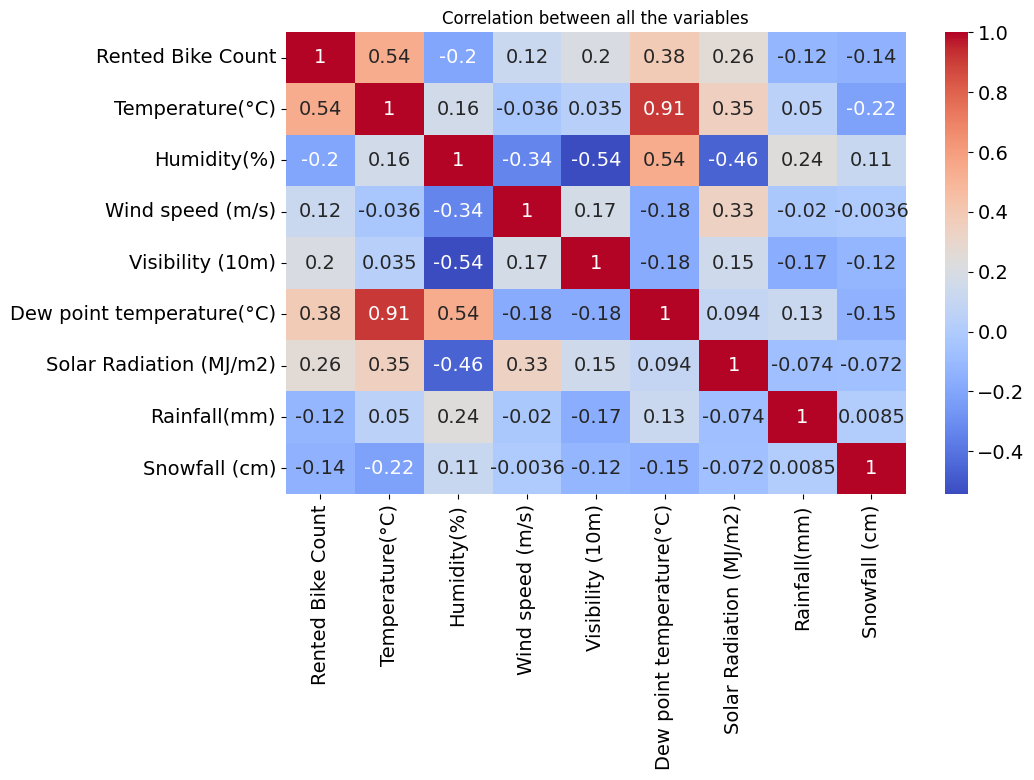

In [200]:
#Heatmap for co-relation in features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the variables', size=12)
plt.show()

In [201]:
'''From the above experiment i can conclude that Temperature and Dew point temperature(°C) has the high correlation.
we drop this column then it don't affects the outcome of our analysis.'''
df.drop(columns= ['Dew point temperature(°C)'], inplace=True)


### What all manipulations have you done and insights you found?

1. So i converted the "date" column into 3 different column i.e "year","month","day". The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
2. The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 (Bar plot)

[Text(0.5, 1.0, 'Count of Rented bikes according to Month ')]

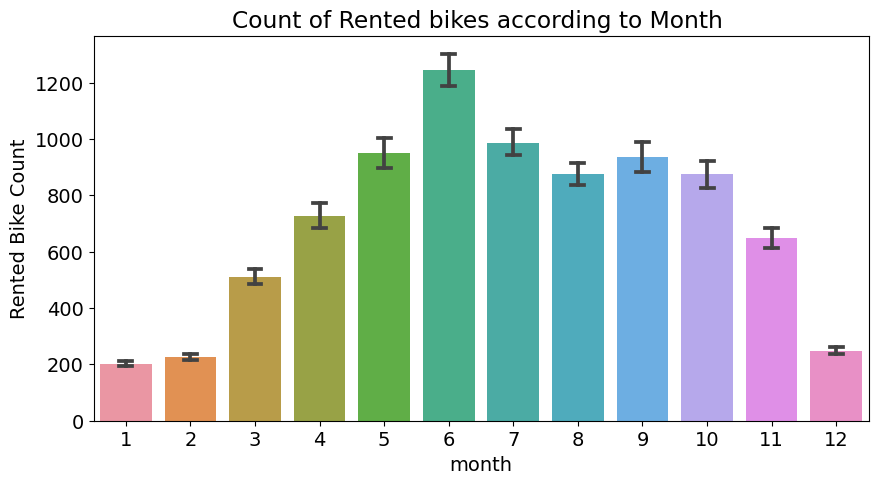

In [202]:
# Chart - 1 visualization code
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Month ')

##### 1. Why did you pick the specific chart?

To get the count of Rented bikes acording to Months.

##### 2. What is/are the insight(s) found from the chart?

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above bar plot we can clearly say that from the month 5 to 10 the demand of the rented bike is high as compare to other months therefore the company can be preperd before month 5 with high number of bikes in reserve.

#### Chart - 2 (Bar plot)

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays_weekenday ')]

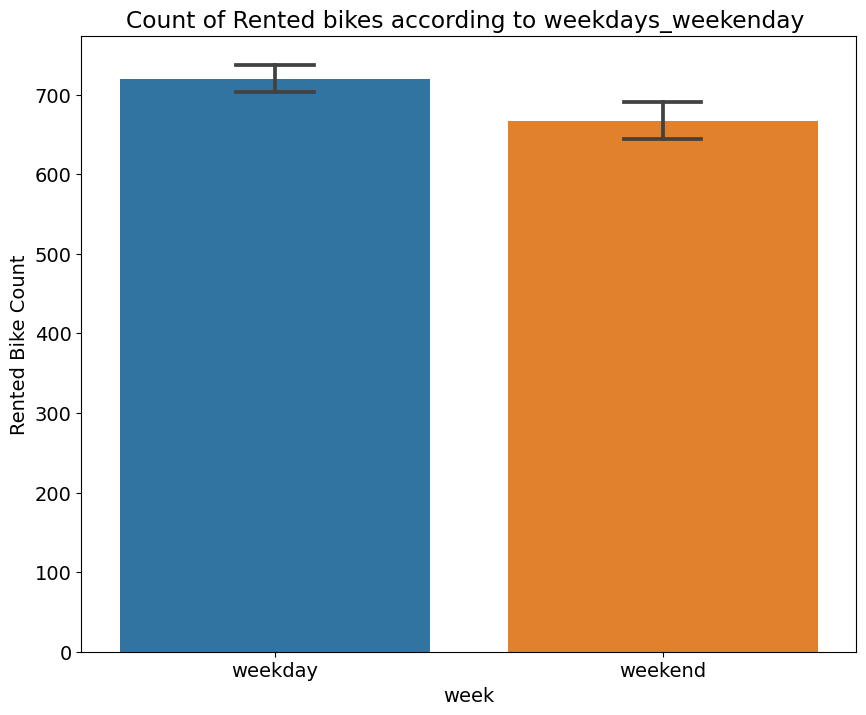

In [203]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='week',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to weekdays_weekenday ')

##### 1. Why did you pick the specific chart?

To count of Rented bikes acording to weekdays and weekenday.

##### 2. What is/are the insight(s) found from the chart?

The Count of Rented bikes in weekdays are more then weekenday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the number of rented bikes are more on weekday while compare to weekends but the number of days in weekend is less then weekdays therefore the demand for bike in weekends is also there.

#### Chart - 3 (Point plot)

[Text(0.5, 1.0, 'Count of Rented bikes according to weekdays_weekend and hourly')]

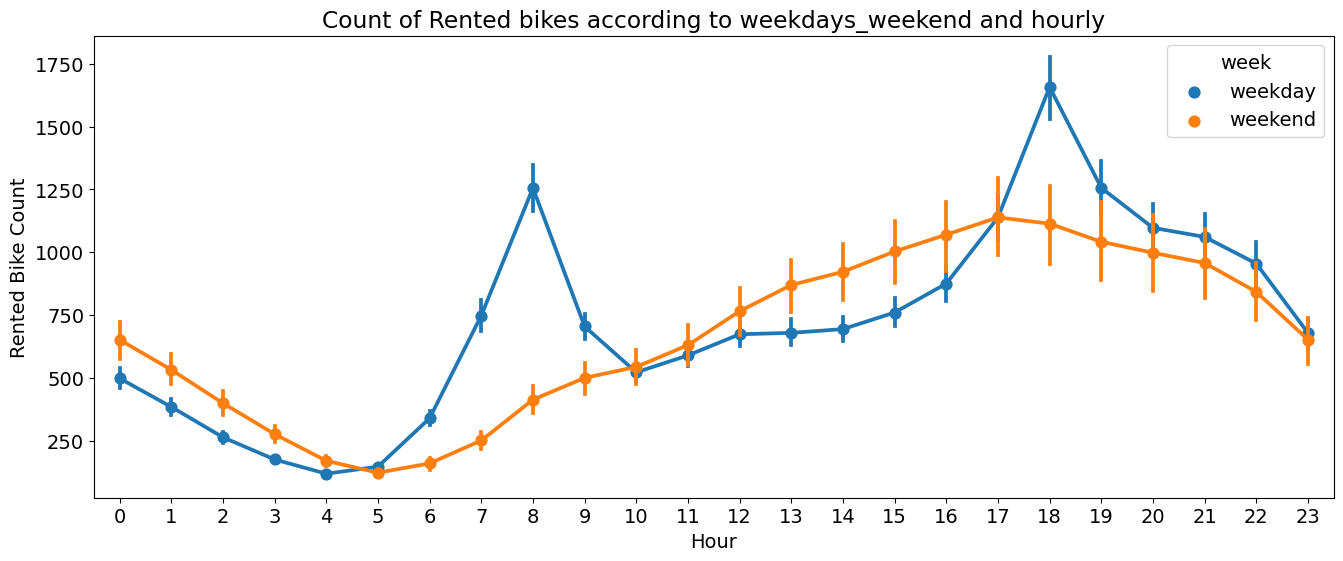

In [204]:
# Chart - 3 visualization code
fig,ax=plt.subplots(figsize=(16,6))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='week',ax=ax)
ax.set(title='Count of Rented bikes according to weekdays_weekend and hourly')

##### 1. Why did you pick the specific chart?

To count of Rented bikes acording to weekdays_weekend and hourly.

##### 2. What is/are the insight(s) found from the chart?

From the above point plot and bar plot we can say that in the week days which represent in blue colur show that the demand of the bike higher because of the office. Peak Time are 7 am to 9 am and 5 pm to 7 pm The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 For the blue line peak time are 7 am to 9 am and 5 pm to 7 pm, therefore before that timings the company has to make such a stratagy to handle that peak demand for bikes and also for 4 pm to 8 pm for the orange line demand slightly increases.

#### Chart - 4 (Bar plot)

[Text(0.5, 1.0, 'Count of Rented bikes according to Functioning Day ')]

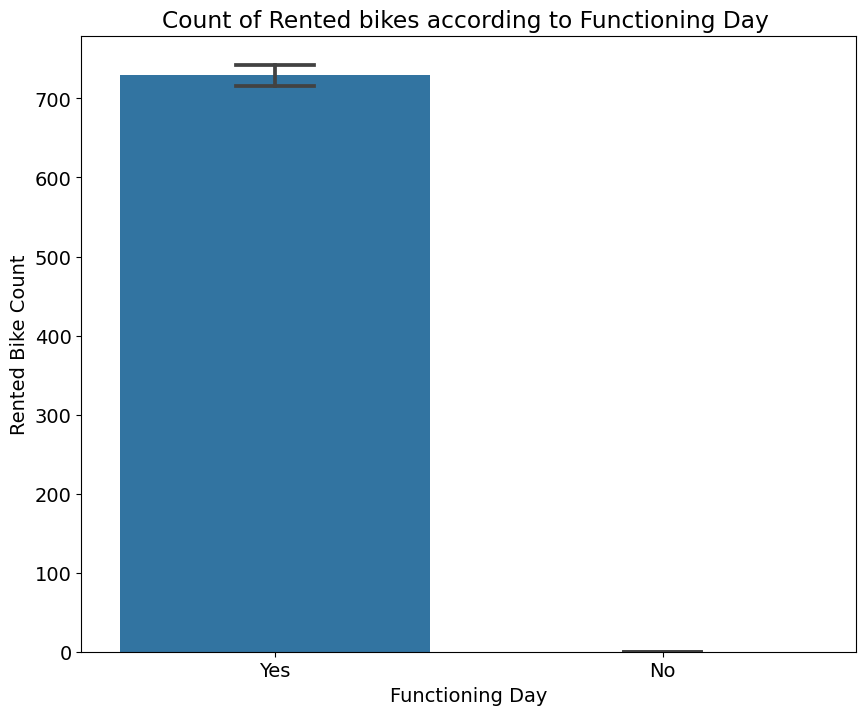

In [205]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes according to Functioning Day ')

##### 1. Why did you pick the specific chart?

To count of Rented bikes according to Functioning Day.

##### 2. What is/are the insight(s) found from the chart?

The Count of Rented bikes on not Functioning Day is zero.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Count of Rented bikes on not Functioning hours is zero. Therefore to increase the reveue the non-functional hours should be kept minimum.

#### Chart - 5 (point plot)

[Text(0.5, 1.0, 'Count of Rented bikes according to Functioning hours ')]

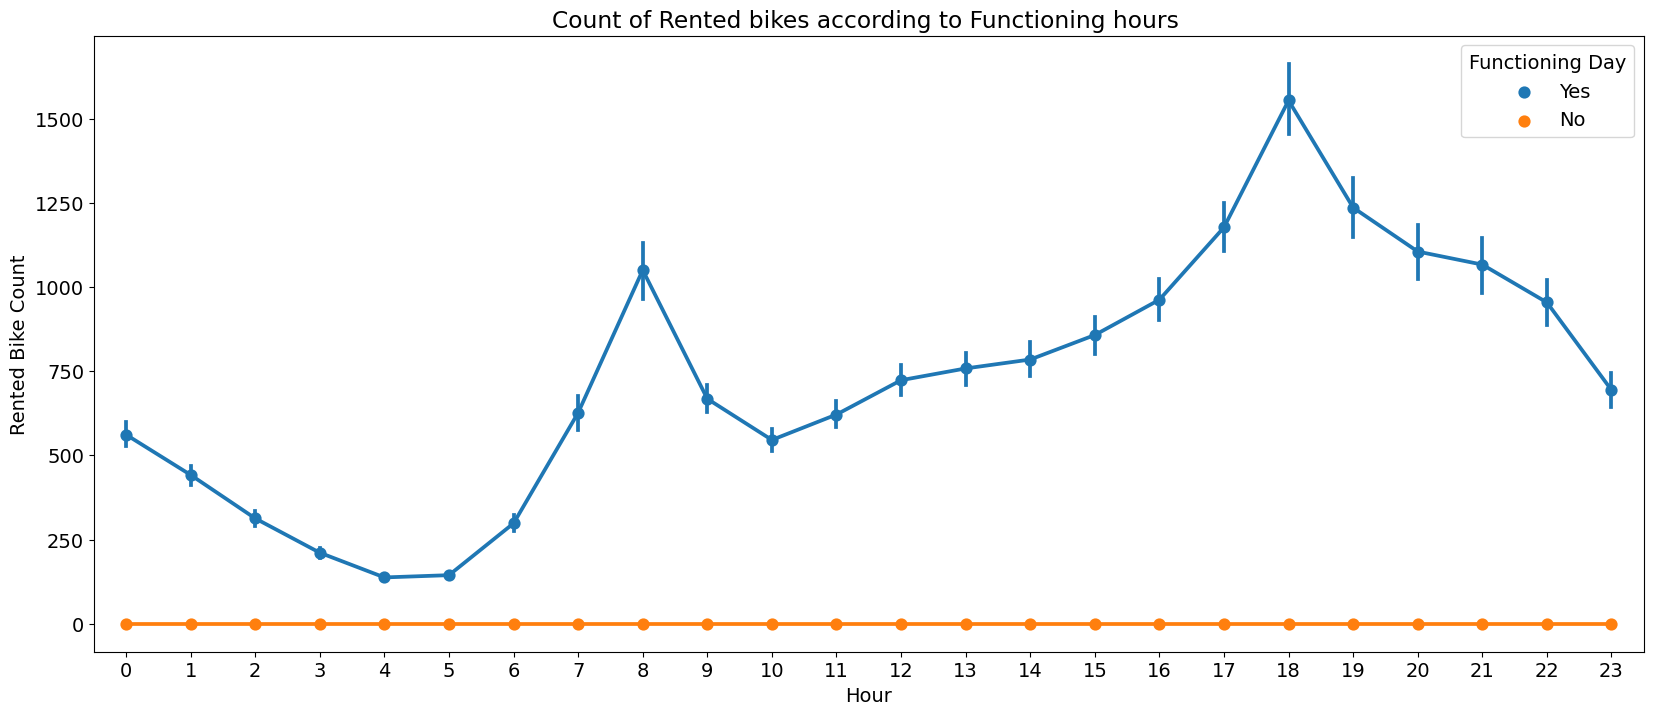

In [206]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes according to Functioning hours ')

##### 1. Why did you pick the specific chart?

In the above point plot which shows the use of rented bike in functioning day or not, and it clearly shows that, Peoples dont use reneted bikes in no functioning day

##### 2. What is/are the insight(s) found from the chart?

The Count of Rented bikes on not Functioning hours is zero.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Count of Rented bikes on not Functioning hours is zero. Therefore to increase the reveue the non-functional hours should be kept minimum.

#### Chart - 6 (Box plot)

[Text(0.5, 1.0, 'Count of Rented bikes according to Seasons ')]

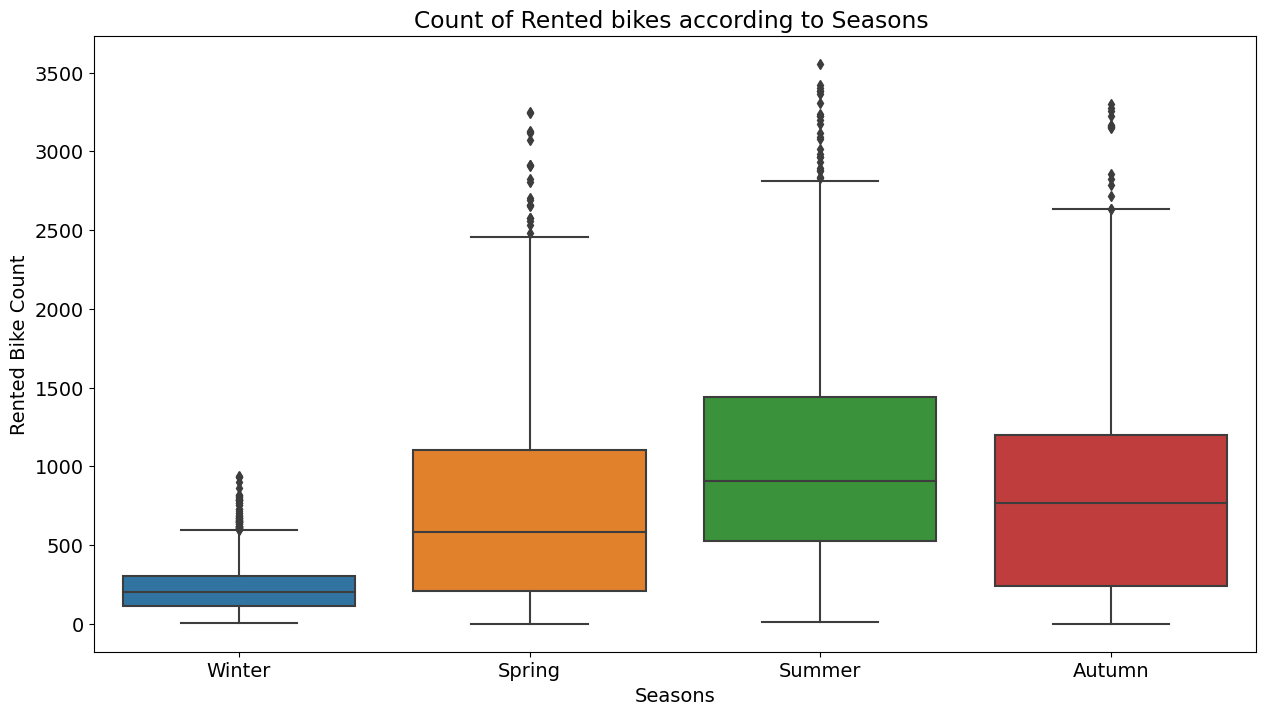

In [207]:
# Chart - 6 visualization code
fig,ax=plt.subplots(figsize=(15,8))
sns.boxplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes according to Seasons ')

##### 1. Why did you pick the specific chart?

To get the count of Rented bikes acording to Seasons.

##### 2. What is/are the insight(s) found from the chart?

In the above box plot which shows the use of rented bike in in four different seasons, and it clearly shows that, In summer season the use of rented bike is high In winter season the use of rented bike is very low because of snowfall.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the demand for the rented bike increase in summer season, the company has to be well prepared for the high demand in that period. As the dmand in winter season decreases the revenue of company also decreases.

#### Chart - 7 (Pie chart)

<Axes: ylabel='Rented Bike Count'>

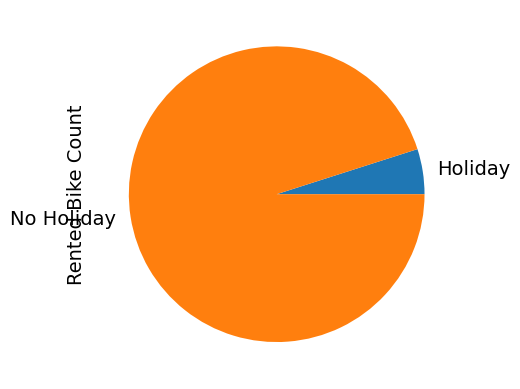

In [208]:
# Chart - 7 visualization code
df.groupby('Holiday').count()['Rented Bike Count'].plot.pie(radius=1)

[Text(0.5, 1.0, 'Count of Rented bikes according to Holiday ')]

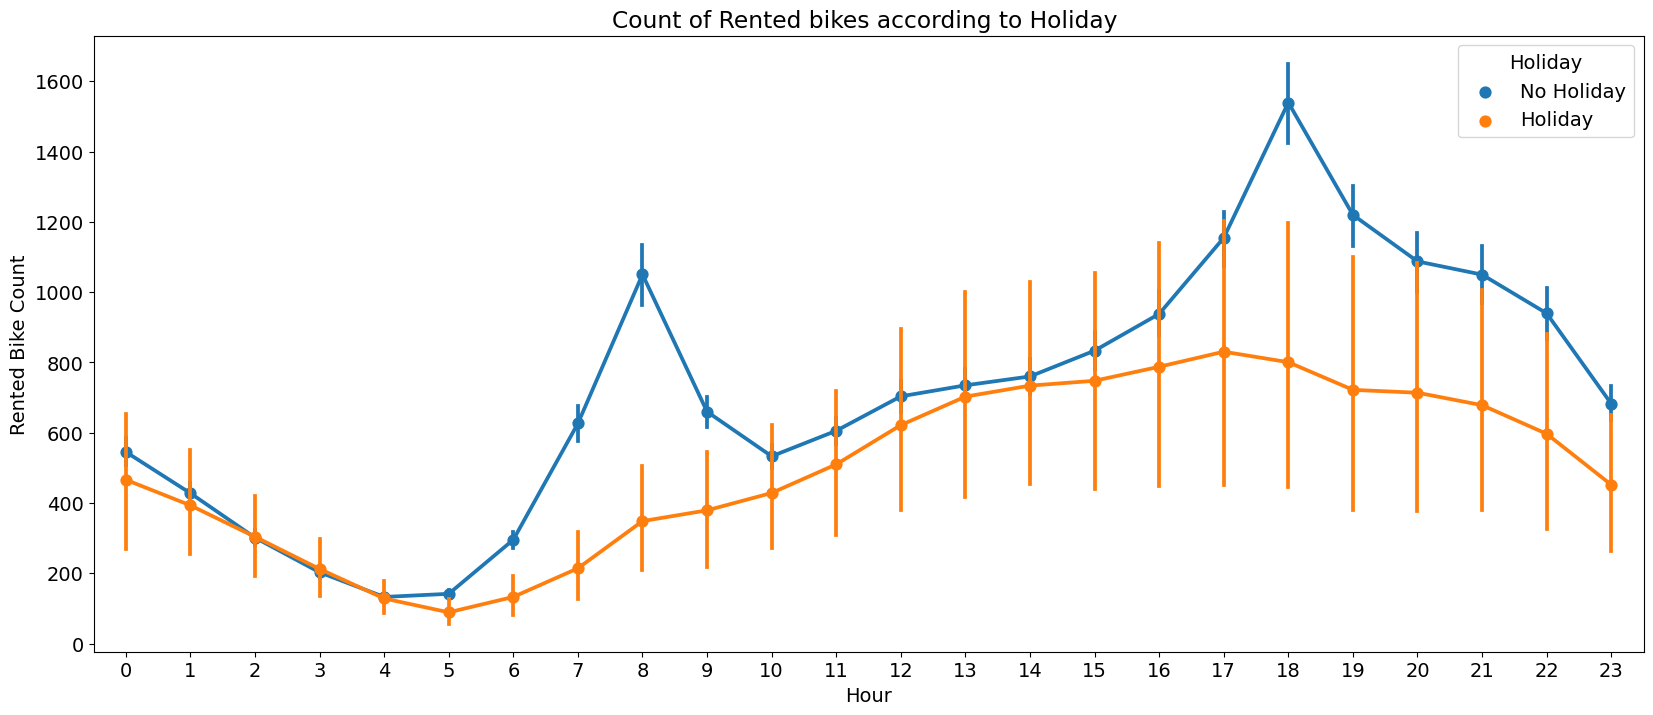

In [209]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes according to Holiday ')

##### 1. Why did you pick the specific chart?

To get the count of Rented bikes acording to Holiday.

##### 2. What is/are the insight(s) found from the chart?

In the above pie plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that, plot shows that in holiday people uses the rented bike from 2pm-8pm

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is clearly shown that, in holiday people uses more rented bike from 2pm-8pm, therefore that demand has to be fulfilled.

#### Chart - 8 (distribution plot)

<Axes: xlabel='Temperature(°C)', ylabel='Density'>

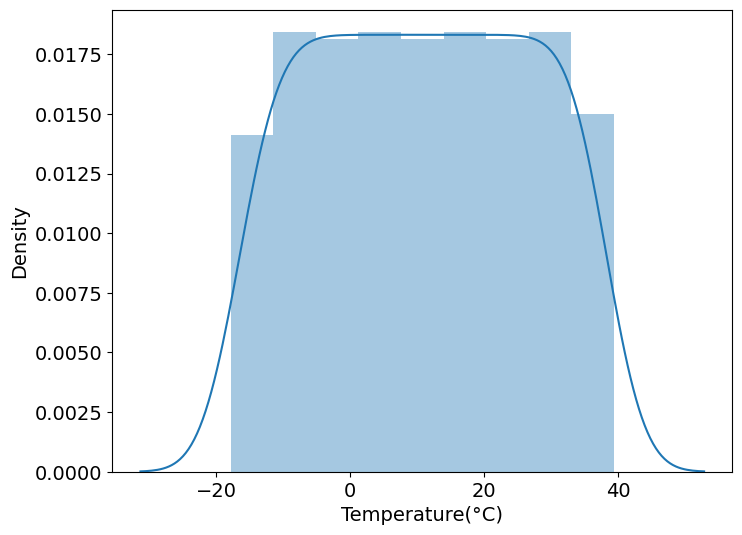

In [210]:
# Chart - 8 visualization code

# creating a dataframe containing the count of bikes rented in different temperature.
df_temp = pd.DataFrame(df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

#plot showing distribution of bike rentals according to temperature intensity.
plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature(°C)'])

##### 1. Why did you pick the specific chart?

To show the distribution of bike rentals according to temperature intensity.

##### 2. What is/are the insight(s) found from the chart?


Above plot shows that people tend to rent bikes when the temperature is between 0 to 25 degrees.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the temperature usually lies between 5 to 35 degrees at that period of temperature the rent of bike also increases therefore it will be the good impact on buisness.

#### Chart - 9 (distribution plot)

<Axes: xlabel='Visibility (10m)', ylabel='Density'>

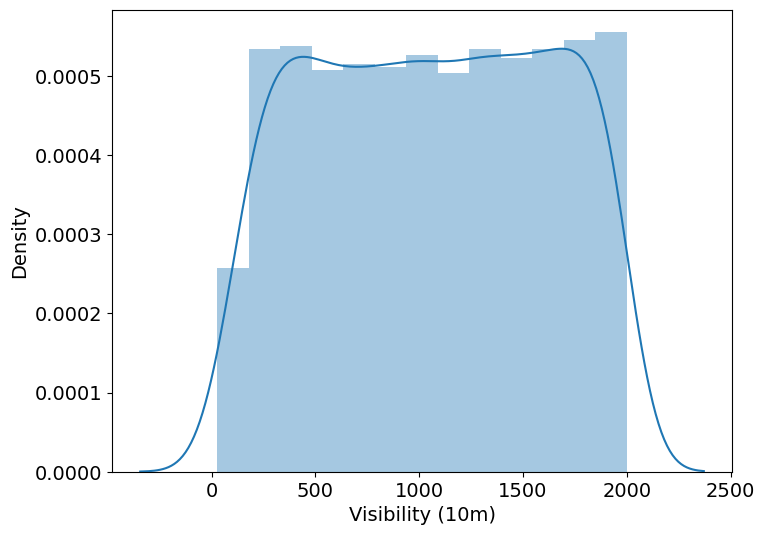

In [211]:
# Chart - 9 visualization code

# creating a dataframe containing the count of bikes rented in differant visibility ranges.
df_visi = pd.DataFrame(df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

# plot showing distribution of bike rentals according to Visibility.
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])


##### 1. Why did you pick the specific chart?

To show the distribution of bike rentals according to Visibility.

##### 2. What is/are the insight(s) found from the chart?

Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As the people are renting the bike more when the visibility is between 400 to 1700. this will give the positive impact to company.

#### Chart - 10 (Line plot)

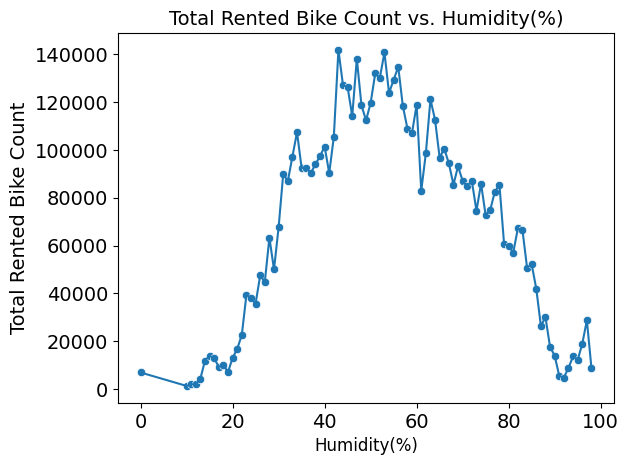

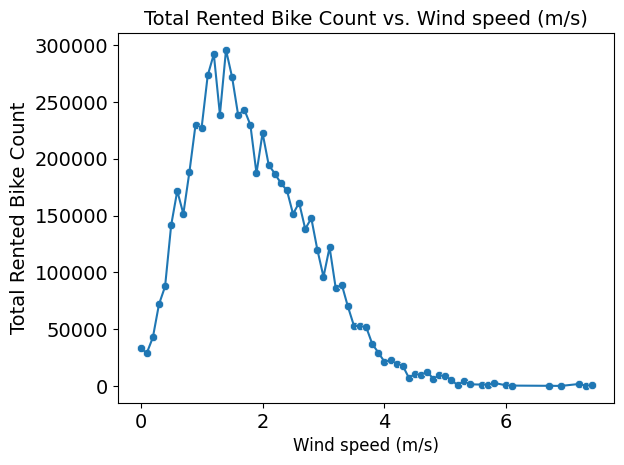

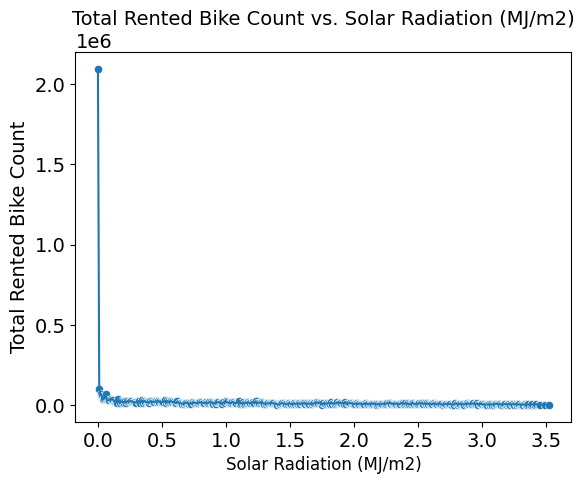

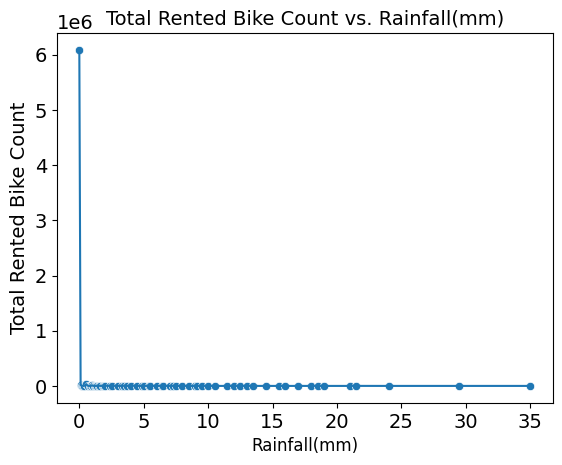

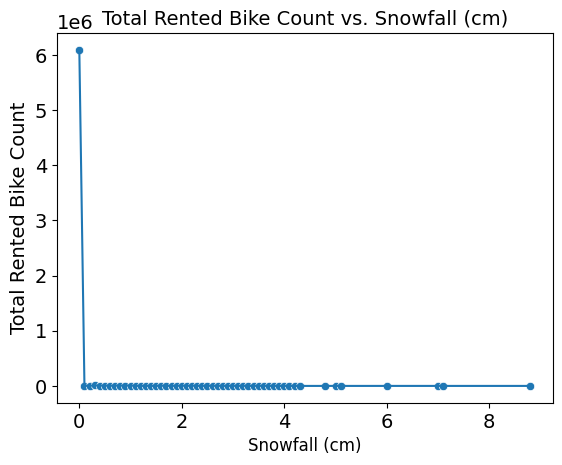

In [212]:
# Chart - 10 visualization code
numrical_features = ['Humidity(%)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

for feature in numrical_features:
  temp_df = df.groupby([feature])['Rented Bike Count'].sum()
  temp_df = temp_df.reset_index()
  sns.scatterplot(data=temp_df, x=feature, y='Rented Bike Count')
  sns.lineplot(x=feature, y='Rented Bike Count', data=temp_df)
  plt.xlabel(feature,  fontsize=12)
  plt.ylabel('Total Rented Bike Count',  fontsize=14)
  plt.title(f'Total Rented Bike Count vs. {feature}',  fontsize=14)
  plt.show()

##### 1. Why did you pick the specific chart?

A line plot helps us understand the trends efficiently.

##### 2. What is/are the insight(s) found from the chart?

The following insights i founded:

1. when the wind speed is 0.3 to 4 people prefer to rent bike.
2. when the soloar radiation is less(0.0), people tend to rent bike.
3. when the Rainfall is less(0.2), people tend to rent bike
4. when the snowfall is less(0.1), people tend to rent bike

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is an impact of the weather conditions on the people renting bikes. For suitable weather conditions the demand for renting increases.

#### Chart - 11 (regression plot for all the numerical features)

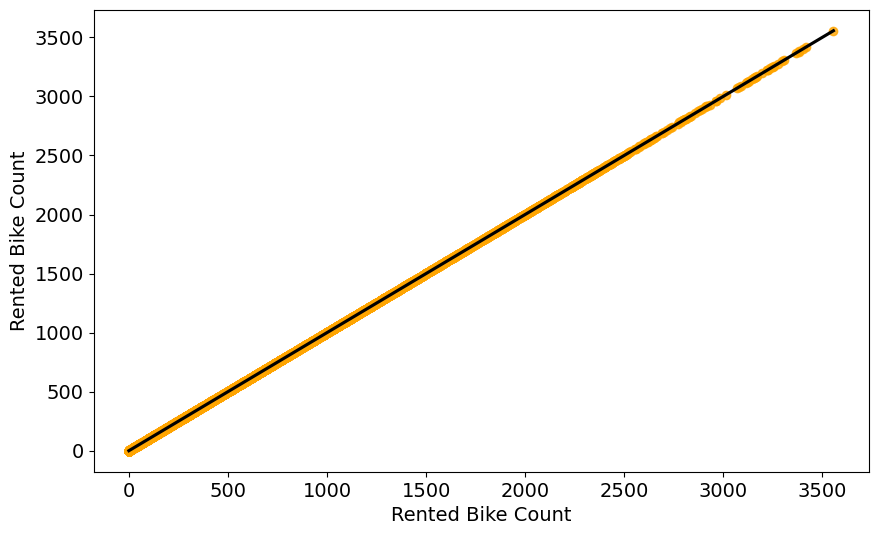

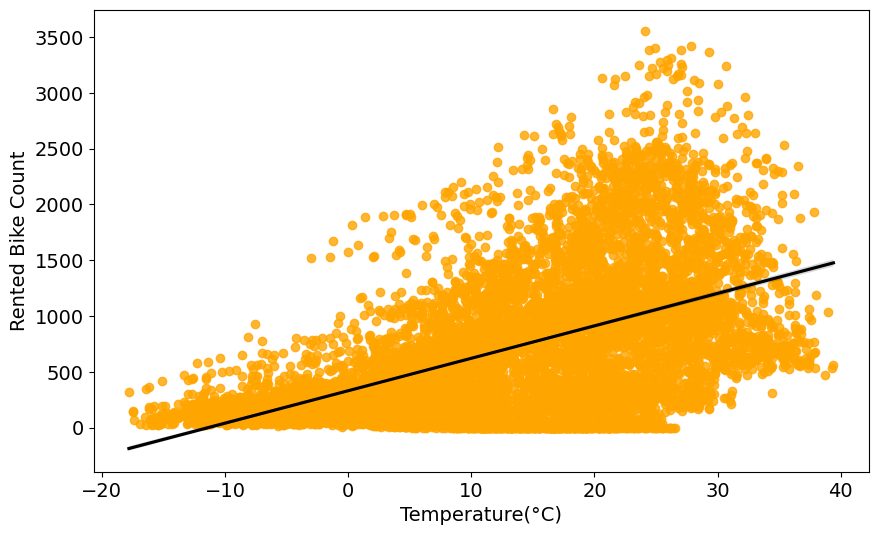

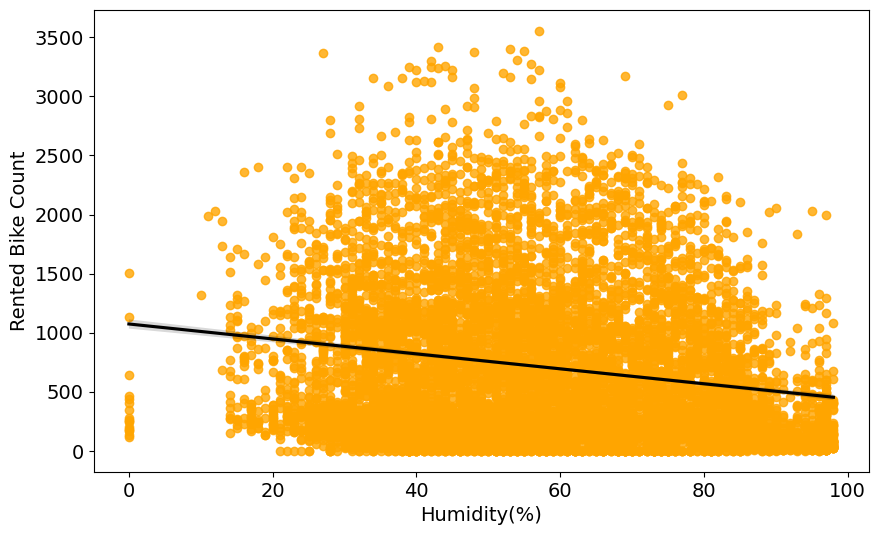

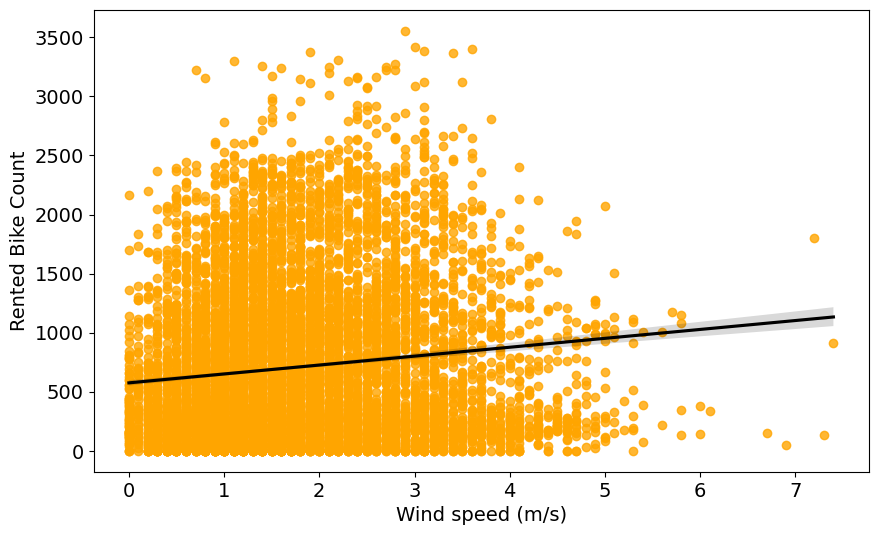

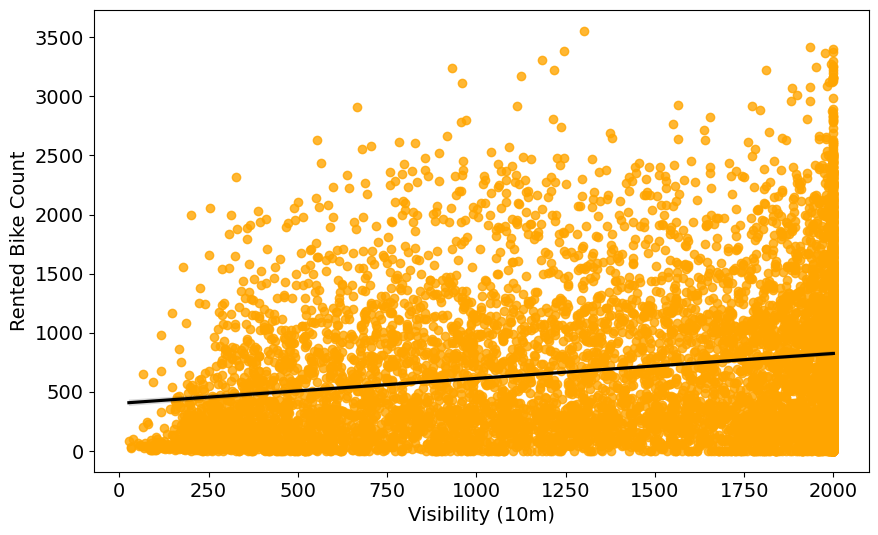

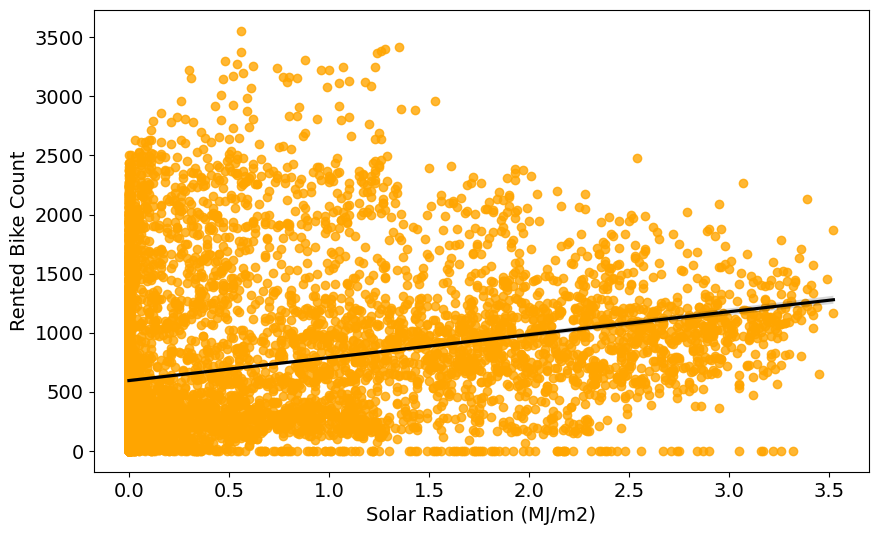

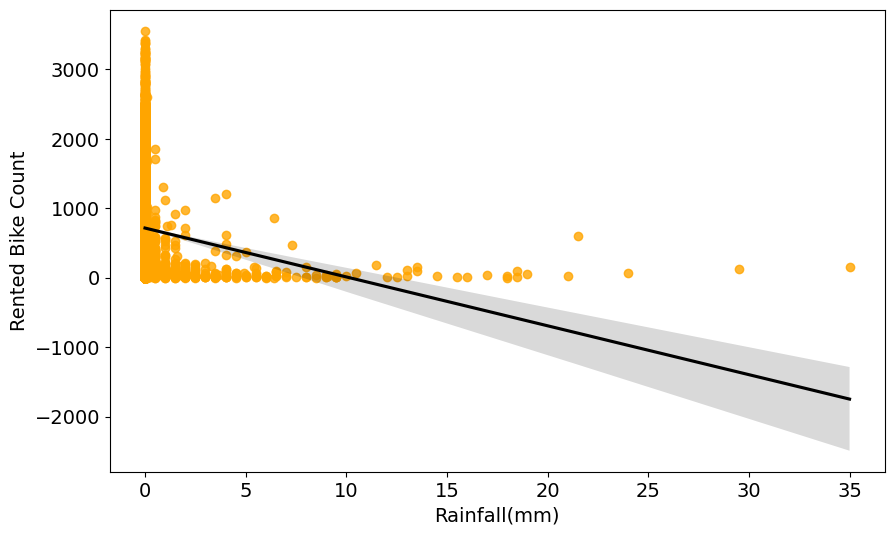

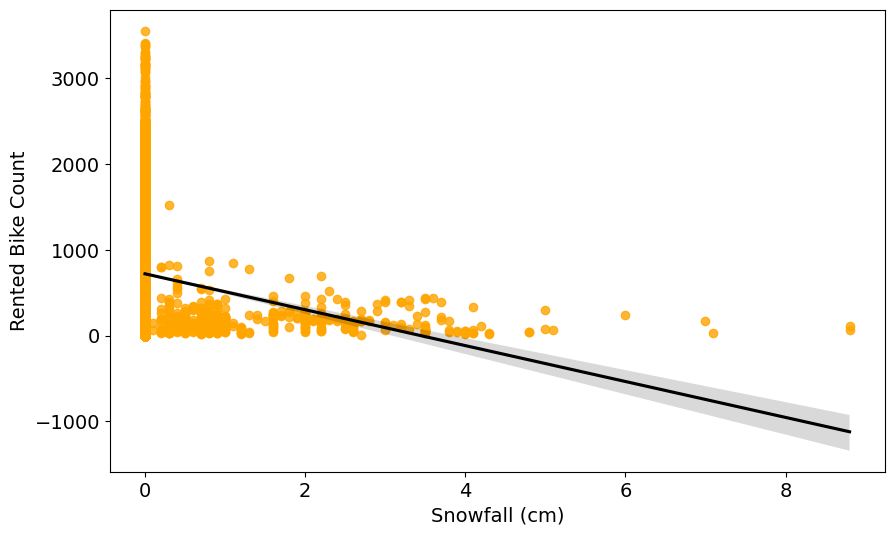

In [213]:
# Chart - 11 visualization code
#printing the regression plot for all the numerical features
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

##### 1. Why did you pick the specific chart?

Linear Regression show the best fit line for the data i.e the avg increase in X with respect to Y

##### 2. What is/are the insight(s) found from the chart?

The insights i found are he following below

1. The increase in temperature(X) from -10 to 30 the demand of rental bikes increases(Y)

2. For the increse in humidity (X) the demand of renatl bikes decreases (Y)

3. For the increase in wind speed(X) from 0 to 3 the demand of rental bikes increases(Y)

4. The best line for visibilty(X) is not showing any increase of rental bike(Y)

5. The best fit line for the Dew point temperature is increasing (X) with respect to increase in rental bikes(X)

6. The best fit line for solar radiation (X) normally increasing with repect to rental bikes

7. The best fit line for the snowfall and rainfall is decresing with respect to rental bikes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights for bussinees is the avg demand of rental bikes on the specific conditions of the environment

#### Chart - 12 - Correlation Heatmap

Text(0.5, 18.52222222222222, 'Feature/Property')

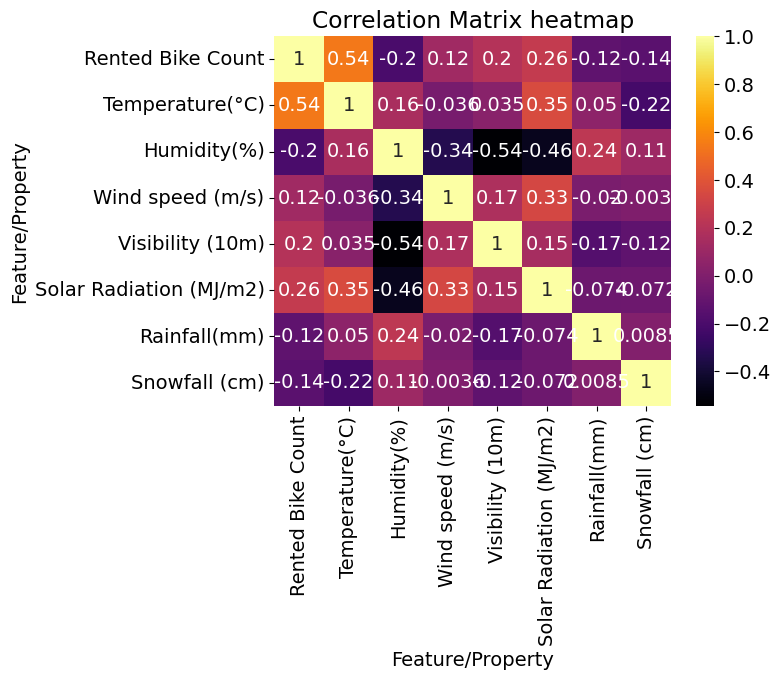

In [214]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')


##### 1. Why did you pick the specific chart?

The corelation chart shows the relation between the two specific feature.

##### 2. What is/are the insight(s) found from the chart?

The corelation shows the insights of the relation between the two features describing from -1 to 1

1. The colser the value to +1 indicates that the two variables are positively correlated. eg: temperature and rented bike count are positively corelated

2. The closer the value to -1 indicates the tow variables are negativly correlated. eg: visibility and humidity are highly corelated.

3. The closer the value towards 0 is less correlation between the two variables.

In [215]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'month', 'week'],
      dtype='object')

#### Chart - 13 - Pair Plot

Text(0.5, 0, 'Feature/Property')

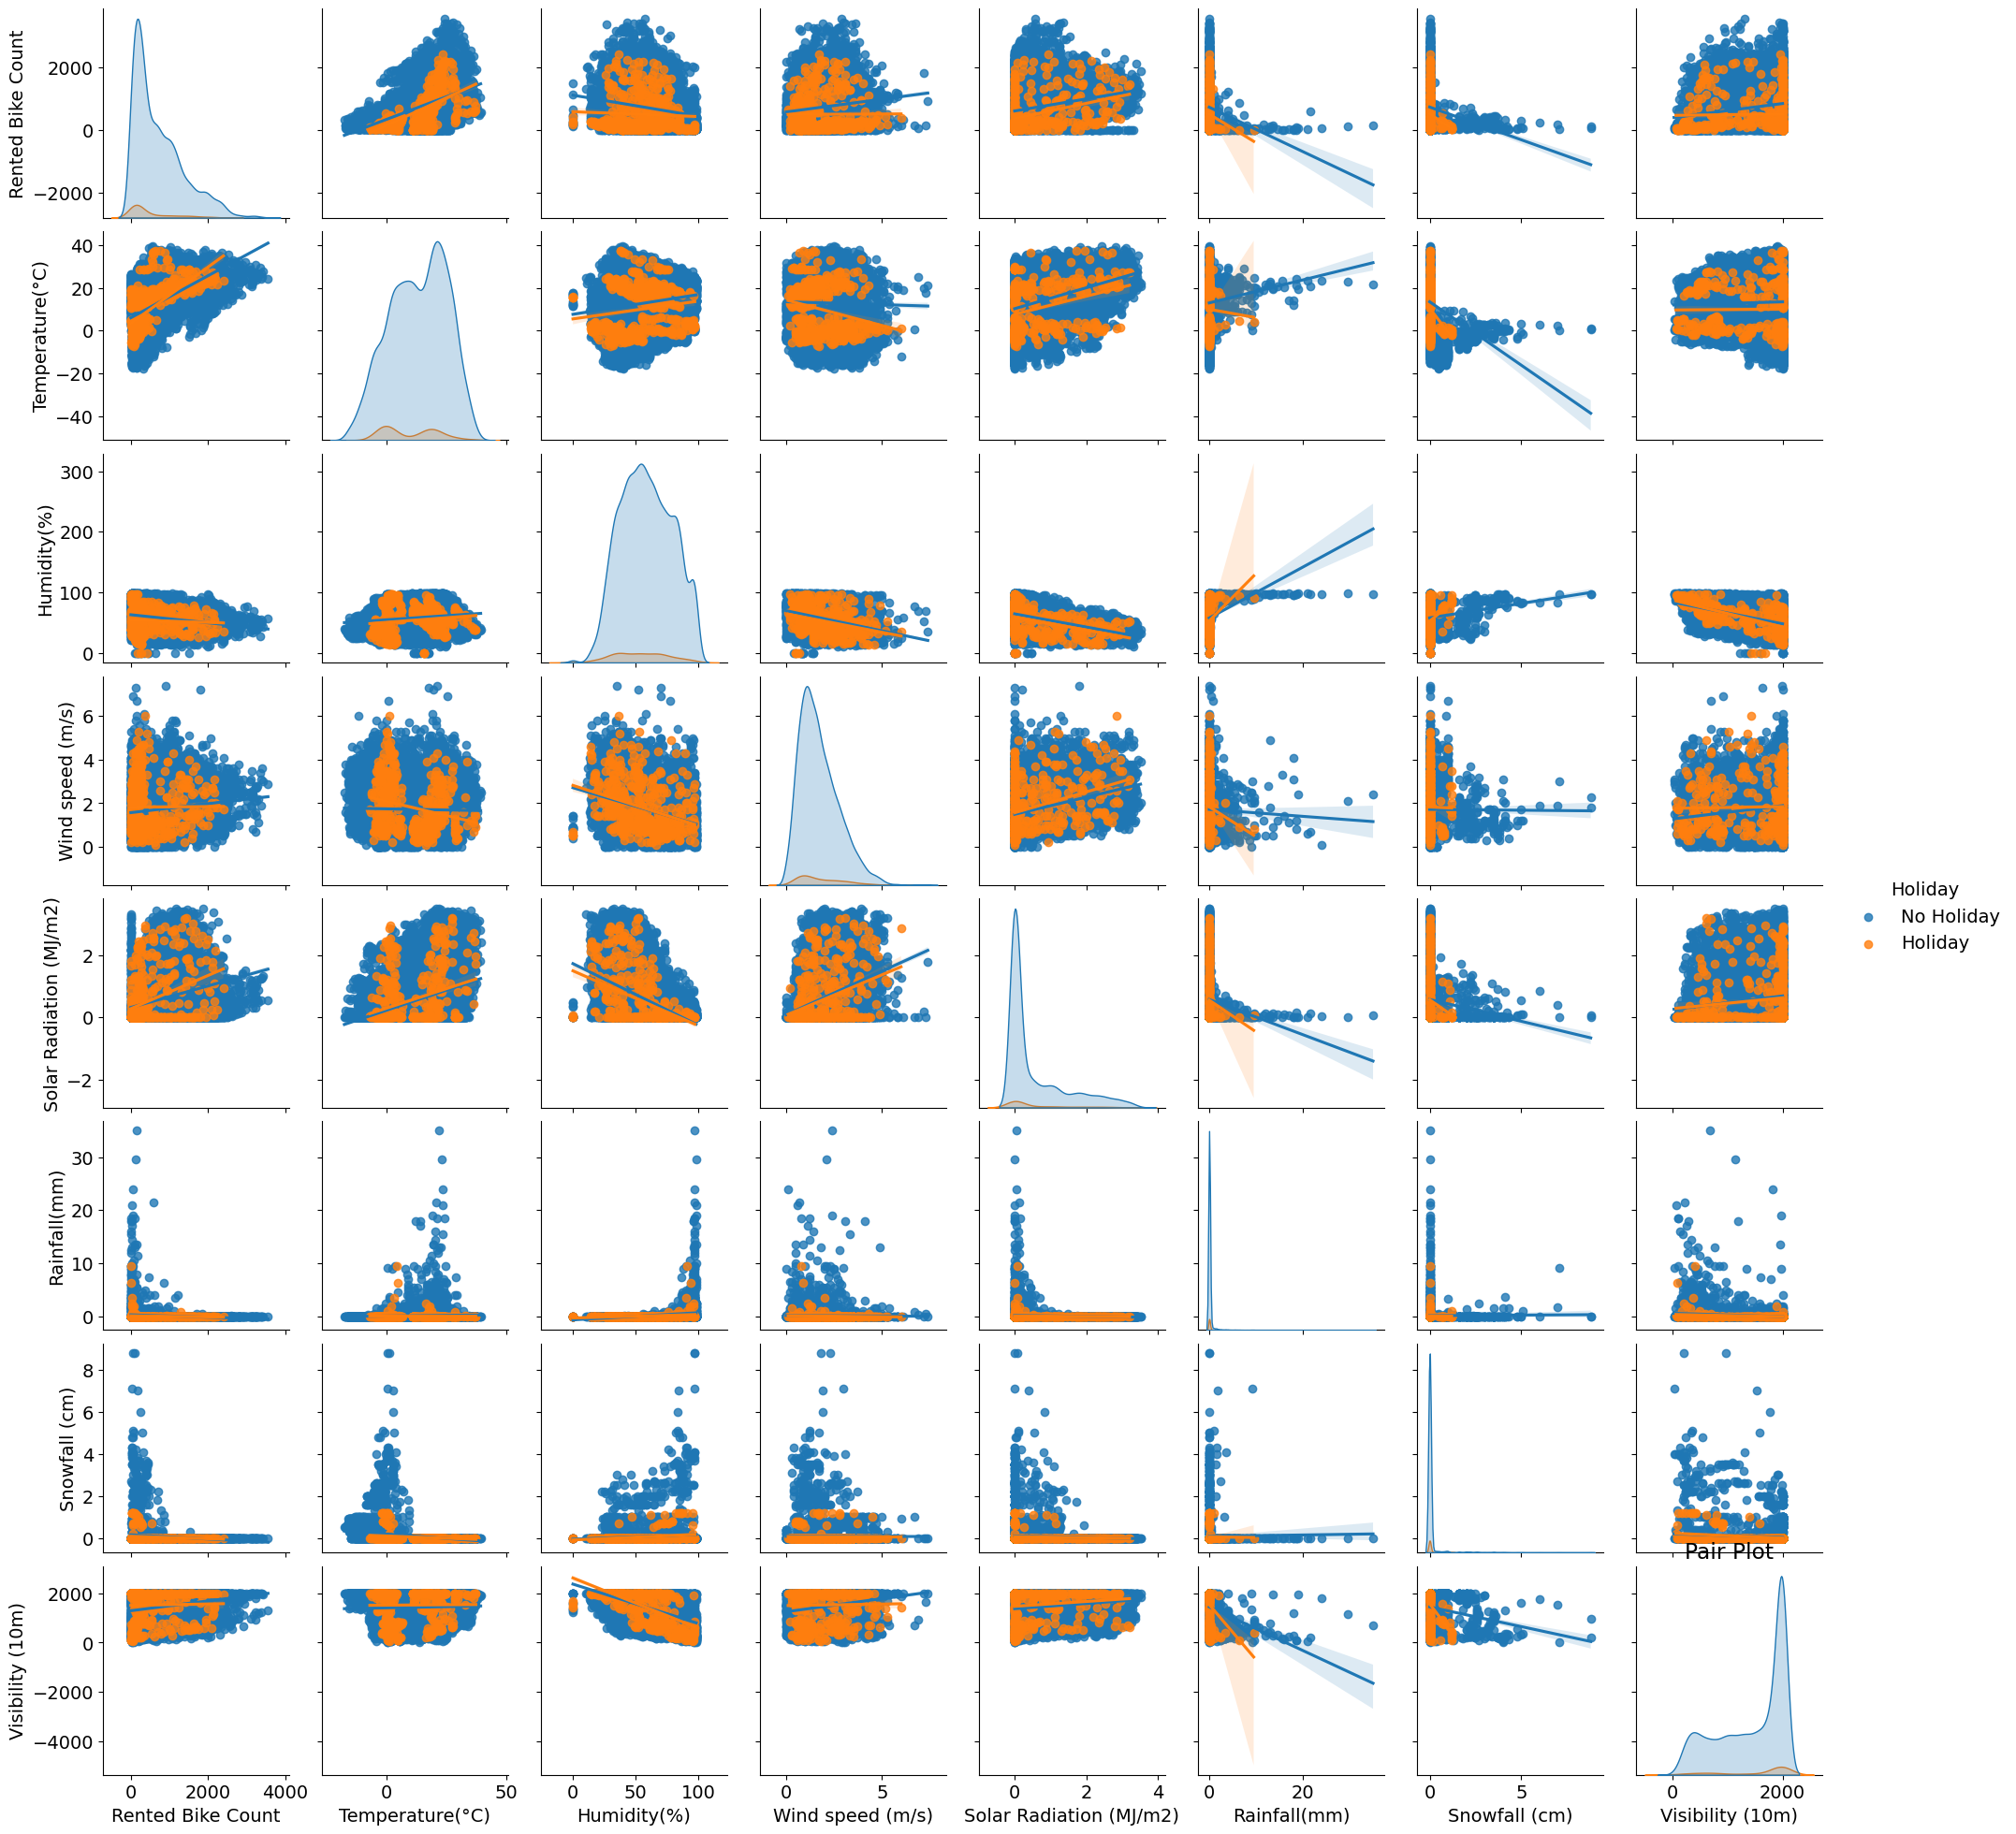

In [216]:
# Pair Plot visualization code
selected_colums =['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Visibility (10m)','Holiday']
pair_plot_df = df[selected_colums]

# # same can be implemented using the below code
# pair_plot_df = df.copy()
# pair_plot_df.drop(columns = ['Year','Functioning Day', 'Month', 'Day', 'Hour', 'Seasons'], inplace=True)

sns.pairplot(pair_plot_df, diag_kind="kde", kind = 'reg', hue = 'Holiday')

#setting labels to infer the plot
plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')


##### 1. Why did you pick the specific chart?

Pair plots are used to show relationship between various variables.Pair plots can also help us explore the distribution of variables in your dataset.

##### 2. What is/are the insight(s) found from the chart?

1. We see that there is a positive correlation beween wind speed and sloar radiation.

2. Temperature and rented bike count are highly corellated.

3. Humidity and solar radiation are negativly corelated.

4. The diagonal graphs show the kde plotted wrt the own feature, it is noted that the diagonal plots doesnot follow the scale.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research hypothesis: The average bike count at any point of time is greater than 100.

*   Null hypothesis H0: Average = 100.
*   Alternate hypothesis Ha: Average > 100.

#### 2. Perform an appropriate statistical test.

In [217]:
# Perform Statistical Test to obtain P-Value
rented_bike_count_sample = df['Rented Bike Count'].sample(500)
rented_bike_count_mean = np.mean(rented_bike_count_sample)
rented_bike_count_std = np.std(rented_bike_count_sample)

In [218]:
ts = (rented_bike_count_mean-100)/(rented_bike_count_std/(np.sqrt(500)))
ts

20.713016779329973

In [219]:
# Calculating the probability
prob_z = norm.cdf(ts, 0, 1)
print(prob_z)


1.0


In [220]:
p1 = 1-prob_z
p1

0.0

##### Which statistical test have you done to obtain P-Value?

I have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average bike count in city at any point of time is greater than 100.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average temperature at any point of time is grater than 10 degree Celsius.

* Null hypothesis H0: Average = 10.

* Alternate hypothesis Ha: Average > 10.

#### 2. Perform an appropriate statistical test.

In [221]:
# Perform Statistical Test to obtain P-Value
temp_sample = df['Temperature(°C)'].sample(500)
temp_mean = np.mean(temp_sample)
temp_std = np.std(temp_sample)

ts2 = (temp_mean-10)/(temp_std/(np.sqrt(500)))
ts2

6.441048033779793

In [222]:
prob_z = norm.cdf(ts2, 0, 1)
print(prob_z)

0.9999999999406743


In [223]:
p1 = 1-prob_z
p1

5.932565549926494e-11

##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is 99%, so we have sufficient evidence to reject H0. Therefore, the average temperature at any point of time is greater than 10 degrees.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Standard deviation of humdidity is 20.

* Null hypothesis H0: Standard deviaiton != 20.

* Alternate hypothesis Ha: Standard deviaiton = 20.

#### 2. Perform an appropriate statistical test.

In [224]:
# Perform Statistical Test to obtain P-Value
humid_sample = df['Humidity(%)'].sample(50)
S2 = (np.std(humid_sample))**2

ts3 = (49 * S2)/(20*20)
ts3

32.031741

In [225]:
prob = chi2.cdf(ts3,49)
print(prob)

0.029017791963948627


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for standard deviation, we have chosen Chi2-test to obtain p-value. The probability we have obtained is 78.36%, so we have sufficient evidence to reject H0. Therefore, the standard deviation of humidity is 20.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

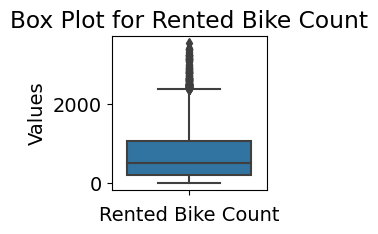

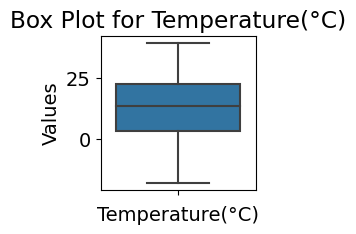

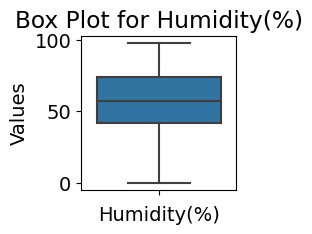

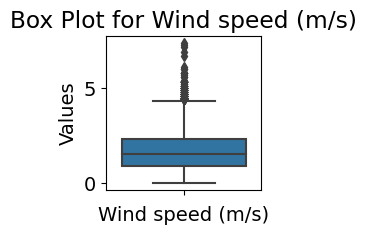

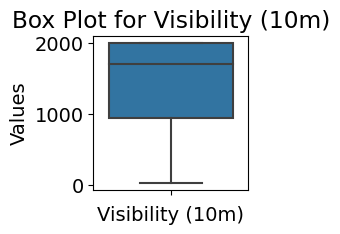

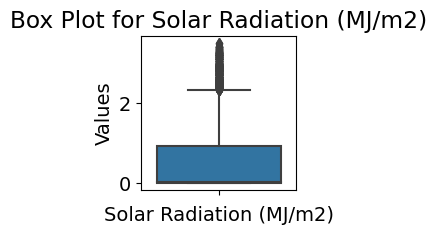

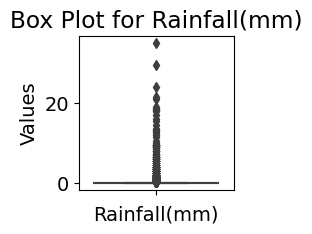

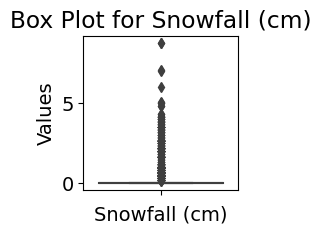

In [226]:
# Handling Outliers & Outlier treatments
numerical_vars = df.describe().columns
for var in numerical_vars:
   plt.figure(figsize=(2, 2))
   sns.boxplot(y=var, data=df)
   plt.xlabel(var)
   plt.ylabel('Values')
   plt.title(f'Box Plot for {var}')
   plt.show()


In [227]:
# finding the inter-quartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count           874.25
Temperature(°C)              19.00
Humidity(%)                  32.00
Wind speed (m/s)              1.40
Visibility (10m)           1060.00
Solar Radiation (MJ/m2)       0.93
Rainfall(mm)                  0.00
Snowfall (cm)                 0.00
dtype: float64


In [228]:
# listing features to remove outliers
features = list(df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','week']
new_features = [x for x in features if x not in list_0]
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [229]:
# removing outliers
df[new_features] = df[new_features][~((df[new_features] < (Q1 - 1.5 * IQR)) |(df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [230]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          7078 non-null   float64 
 4   Humidity(%)              7078 non-null   float64 
 5   Wind speed (m/s)         7078 non-null   float64 
 6   Visibility (10m)         7078 non-null   float64 
 7   Solar Radiation (MJ/m2)  7078 non-null   float64 
 8   Rainfall(mm)             7078 non-null   float64 
 9   Snowfall (cm)            7078 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

##### What all outlier treatment techniques have you used and why did you use those techniques?

The inter-quartile range is used to remove the outliers because inter-quartile range technique is bestfited for removing outliers for above dataset.

### 2. Handling Missing Values

In [231]:
# Handling Missing Values & Missing Value Imputation

# filling null values with mean values
df['Temperature(°C)'] = df['Temperature(°C)'].fillna(df['Temperature(°C)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind speed (m/s)'] = df['Wind speed (m/s)'].fillna(df['Wind speed (m/s)'].mean())
df['Visibility (10m)'] = df['Visibility (10m)'].fillna(df['Visibility (10m)'].mean())

df['Solar Radiation (MJ/m2)'] = df['Solar Radiation (MJ/m2)'].fillna(df['Solar Radiation (MJ/m2)'].mean())
df['Rainfall(mm)'] = df['Rainfall(mm)'].fillna(df['Rainfall(mm)'].mean())
df['Snowfall (cm)'] = df['Snowfall (cm)'].fillna(df['Snowfall (cm)'].mean())

In [232]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Date                     8760 non-null   object  
 1   Rented Bike Count        8760 non-null   int64   
 2   Hour                     8760 non-null   category
 3   Temperature(°C)          8760 non-null   float64 
 4   Humidity(%)              8760 non-null   float64 
 5   Wind speed (m/s)         8760 non-null   float64 
 6   Visibility (10m)         8760 non-null   float64 
 7   Solar Radiation (MJ/m2)  8760 non-null   float64 
 8   Rainfall(mm)             8760 non-null   float64 
 9   Snowfall (cm)            8760 non-null   float64 
 10  Seasons                  8760 non-null   object  
 11  Holiday                  8760 non-null   object  
 12  Functioning Day          8760 non-null   object  
 13  month                    8760 non-null   category
 14  week    

#### What all missing value imputation techniques have you used and why did you use those techniques?

Filling the null values wit the mean values.

### 3. Categorical Encoding

In [233]:
# Encode your categorical columns
# convert object type data to dumy variables(binary form)

df['Winter']=np.where(df["Seasons"]=='Winter',1,0)
df['Spring']=np.where(df["Seasons"]=='Spring',1,0)
df['Summer']=np.where(df["Seasons"]=='Summer',1,0)
df['Autumn']=np.where(df["Seasons"]=='Autumn',1,0)
df['week']=np.where(df["week"]=='weekday',1,0)
df['Holiday']=np.where(df["Holiday"]=='Holiday',1,0)
df['Functioning Day']=np.where(df['Functioning Day']=='Yes',1,0)

# Since Seasons is encoded into 4 new features we are dropping the orignal feature
df.drop(['Seasons','Date'],axis=1, inplace = True)

x=['month','Hour']
for i in x:
      df = pd.concat([df, pd.get_dummies(df[i], prefix=i, drop_first=True)], axis=1)
      df = df.drop([i], axis=1)


In [234]:
#dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   float64
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   float64
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  week                     8760 non-null   int64  
 11  Winter                   8760 non-null   int64  
 12  Spring                   8760 non-null   int64  
 13  Summer                   8760 non-null   int64  
 14  Autumn                  

#### What all categorical encoding techniques have you used & why did you use those techniques?

For Seaseons column we have created 4 new colums with respect to their categorical values, and encoded the same as 1 for equal values and 0 as other values.

example: for winter we have set as 1 in the winter column were as for other values we have encoded as 0

since we had 2 values for holiday and functioning day we have updated the same column as 0 and 1

we had 12 different values for Month and 24 values in hour we have used One hot encoding, and also dropping the first column of each encoded column. This method is an effective technique used to represent categorical variables as numerical values for a machine learning model.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

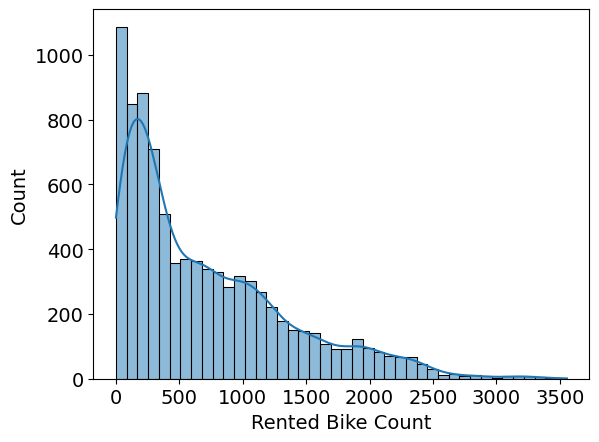

In [235]:
# Transform Your data
# PLotting the histgram to show the distribution of Rented bike count.
sns.histplot(df['Rented Bike Count'],kde=True)

<Axes: xlabel='Rented Bike Count', ylabel='Count'>

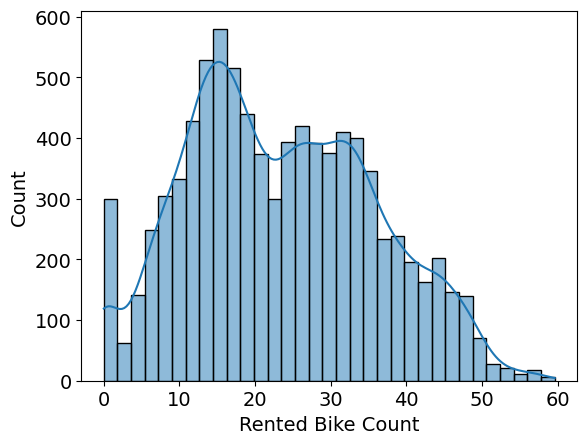

In [236]:
# after plotting hist plot we see that the rented bike count is Right skewed,so it is important to transform the data
df['Rented Bike Count']=np.sqrt(df['Rented Bike Count'])
sns.histplot(df['Rented Bike Count'],kde=True)

### 8. Data Splitting

In [256]:
# Split your data to train and test. Choose Splitting ratio wisely.
x = df.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(df['Rented Bike Count'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state=4)


In [257]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(7008, 48) (7008,)
(1752, 48) (1752,)


##### What data splitting ratio have you used and why?

As a standard practice we have split the data into 80-20 ratio.

## ***7. ML Model Implementation***

In [258]:
# initiating test and train dictionary for future reference and comparing values
train={}
test={}

In [259]:
# writing a function to copute all the required test stastics to interpret the results

def modelfit(model, X_train, X_test, y_train, y_test, output_name) :
  '''this function implements the given model calculates the stastics and add the results to train and test dictionaries
  '''
  # Fit the Algorithm
  model.fit(X_train, y_train)
  score = model.score(X_train, y_train)
  print(f'The score for {output_name} is: {score}')

  # Predict on the model
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  print('\n')
  print('-'*50)
  print(f'metrics for {output_name} train data set')
  print('-'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_train), (y_pred_train))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_train), (y_pred_train))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_train, y_pred_train)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  # Formula => Adjusted R-squared = 1 - [(1 - R-squared) * (n - 1) / (n - p - 1)]
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to train dictionary, for future refrences
  train[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n')

  print('-'*50)
  print(f'metrics for {output_name} test data set')
  print('-'*50)

  # calculating and printing mean squred error
  MSE = mean_squared_error((y_test), (y_pred_test))
  print(f'MSE : {MSE}')

  mae = mean_absolute_error((y_test), (y_pred_test))
  print(f'Mean absolute Error : {mae}')

  # calculating and printing root mean square error(RMSE)
  RMSE = np.sqrt(MSE)
  print(f'RMSE : {RMSE}')

  # calculating and printing r^2 score
  r2= r2_score(y_test, y_pred_test)
  print(f'R2 : {r2}')

  # calculating and printing Adjusted r^2
  a_r2 = 1-(1-r2)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print(f'Adjusted R^2: {a_r2}')

  # updating the observed values to test dictionary, for future refrences
  test[output_name]=MSE, mae, RMSE, r2, a_r2
  print('\n')

  # plotting the actual vs. predicted values
  plt.figure(figsize=(10,5))
  plt.title(f'Actual vs. Predicted for {output_name}')
  plt.plot(np.array(y_pred_test))
  plt.plot(np.array((y_test)))
  plt.legend(["Predicted","Actual"])
  plt.show()



```
# This is formatted as code
```

### ML Model - 1

### Linear Regression

The score for Linear Regression is: 0.7529490845288923


--------------------------------------------------
metrics for Linear Regression train data set
--------------------------------------------------
MSE : 0.5542600791832276
Mean absolute Error : 0.5155102543670314
RMSE : 0.7444864533241875
R2 : 0.7529490845288923
Adjusted R^2: 0.7459858173870173


--------------------------------------------------
metrics for Linear Regression test data set
--------------------------------------------------
MSE : 0.5802309799026868
Mean absolute Error : 0.5250507721925931
RMSE : 0.7617289412269215
R2 : 0.7489834935813531
Adjusted R^2: 0.7419084540581029




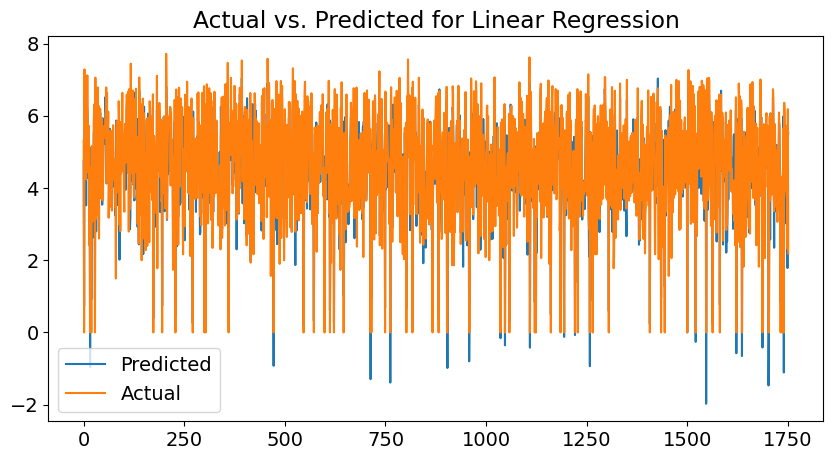

In [260]:
# ML Model - 1 Implementation
''' Passing our train dataset to LinearRegression model than storing to LiReg variable'''
LiReg = LinearRegression()


'''The below code calculates the Mean Squared Error and Root Mean Squared Error for a predictive model's performance evaluation.
  It first reverses the logarithmic transformation applied to the target values for calculation and then prints both MSE and RMSE,
  providing insights into the model's accuracy in predicting the car prices. Lower values of MSE and RMSE indicate better predictive performance.
  And R2, adjusted R2 scores, providing insights into how well the regression model fits the data
  and adjusts for the complexity of the model. These metrics are essential for assessing the quality of the regression model.
  A higher R2 value indicates a better fit of the regression model to the data.'''
modelfit(LiReg, X_train, X_test, y_train, y_test, 'Linear Regression')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression is a statistical technique used to model the relationship between two variables, typically referred to as the independent variable (or predictor variable) and the dependent variable (or response variable). It assumes a linear relationship between these variables, where a change in the independent variable is associated with a constant change in the dependent variable.

The goal of linear regression is to estimate the parameters of the linear equation that best fits the observed data. The equation is typically represented as:

Y = mX + b

### ML Model - 2

### ElasticNet

The score for ElasticNet is: 0.7523271999131693


--------------------------------------------------
metrics for ElasticNet train data set
--------------------------------------------------
MSE : 0.5556552807176811
Mean absolute Error : 0.5203206630941496
RMSE : 0.7454228871705517
R2 : 0.7523271999131693
Adjusted R^2: 0.7453464046083145


--------------------------------------------------
metrics for ElasticNet test data set
--------------------------------------------------
MSE : 0.5826612822616224
Mean absolute Error : 0.5296423260692945
RMSE : 0.7633225283336149
R2 : 0.7479321088245734
Adjusted R^2: 0.7408274354385367




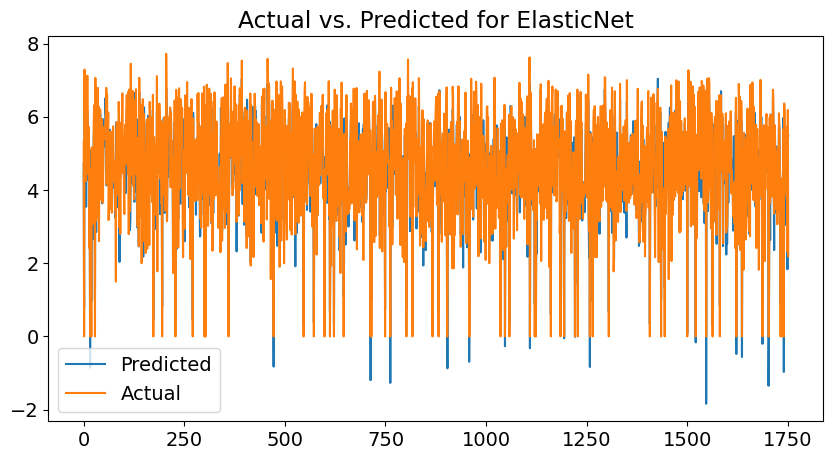

In [261]:
''' Passing our train dataset to ElasticNet model than storing to elasticNet variable'''

elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)




'''The below code calculates the Mean Squared Error and Root Mean Squared Error for a predictive model's performance evaluation.
  It first reverses the logarithmic transformation applied to the target values for calculation and then prints both MSE and RMSE,
  providing insights into the model's accuracy in predicting the car prices. Lower values of MSE and RMSE indicate better predictive performance.
  And R2, adjusted R2 scores, providing insights into how well the regression model fits the data
  and adjusts for the complexity of the model. These metrics are essential for assessing the quality of the regression model.
  A higher R2 value indicates a better fit of the regression model to the data.'''

modelfit(elasticnet, X_train, X_test, y_train, y_test, 'ElasticNet')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

ElasticNet is a statistical method used for linear regression, which combines the L1 (Lasso) and L2 (Ridge) regularization techniques. It aims to overcome the limitations of both methods by adding a mixture of both penalties to the linear regression model. ElasticNet introduces two hyperparameters, alpha and l1_ratio, which control the strength of regularization and the balance between L1 and L2 regularization, respectively. This allows ElasticNet to handle multicollinearity in the data, select relevant features, and achieve better prediction performance compared to Lasso or Ridge alone. In summary, ElasticNet is a flexible regularization technique that combines the advantages of Lasso and Ridge regularization to improve linear regression models by preventing overfitting and improving model interpretability.

### ML Model - 3
### Random Forest

The score for Random Forest is: 0.9559650745778734


--------------------------------------------------
metrics for Random Forest train data set
--------------------------------------------------
MSE : 0.09879259586937163
Mean absolute Error : 0.1477681197427986
RMSE : 0.3143128948506116
R2 : 0.9559650745778734
Adjusted R^2: 0.9547239257697335


--------------------------------------------------
metrics for Random Forest test data set
--------------------------------------------------
MSE : 0.3034898583946009
Mean absolute Error : 0.3012971169690131
RMSE : 0.5508991363168043
R2 : 0.8687057971284483
Adjusted R^2: 0.8650051971649518




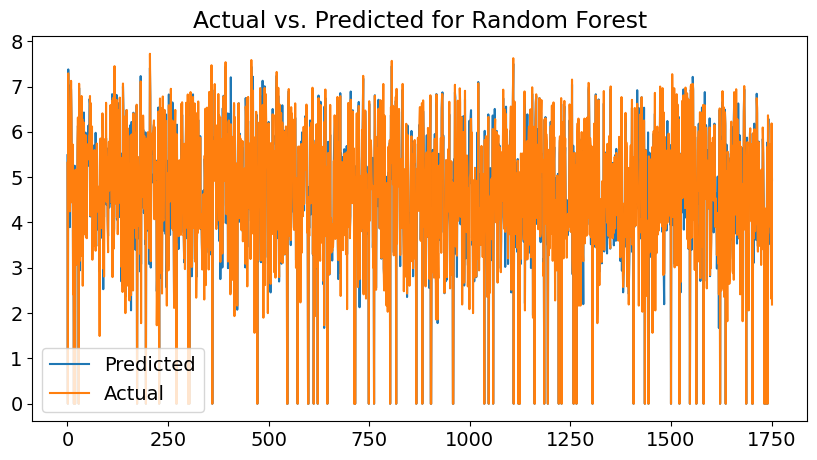

In [247]:
''' Passing our train dataset to RandomForestRegressor model than storing to rf_model variable'''
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

'''The below code calculates the Mean Squared Error and Root Mean Squared Error for a predictive model's performance evaluation.
  It first reverses the logarithmic transformation applied to the target values for calculation and then prints both MSE and RMSE,
  providing insights into the model's accuracy in predicting the car prices. Lower values of MSE and RMSE indicate better predictive performance.
  And R2, adjusted R2 scores, providing insights into how well the regression model fits the data
  and adjusts for the complexity of the model. These metrics are essential for assessing the quality of the regression model.
  A higher R2 value indicates a better fit of the regression model to the data.'''
modelfit(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random Forest is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble method that combines multiple decision trees to make more accurate predictions. The algorithm creates a "forest" of decision trees by randomly selecting a subset of features and data samples from the training dataset. Each tree in the forest is trained independently on these subsets, and their predictions are combined to obtain the final output.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Random forest model is selected because of good score 0.9558368919807363 while compare to other models and also with good Adjusted R^2 score.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [262]:
features = x.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)


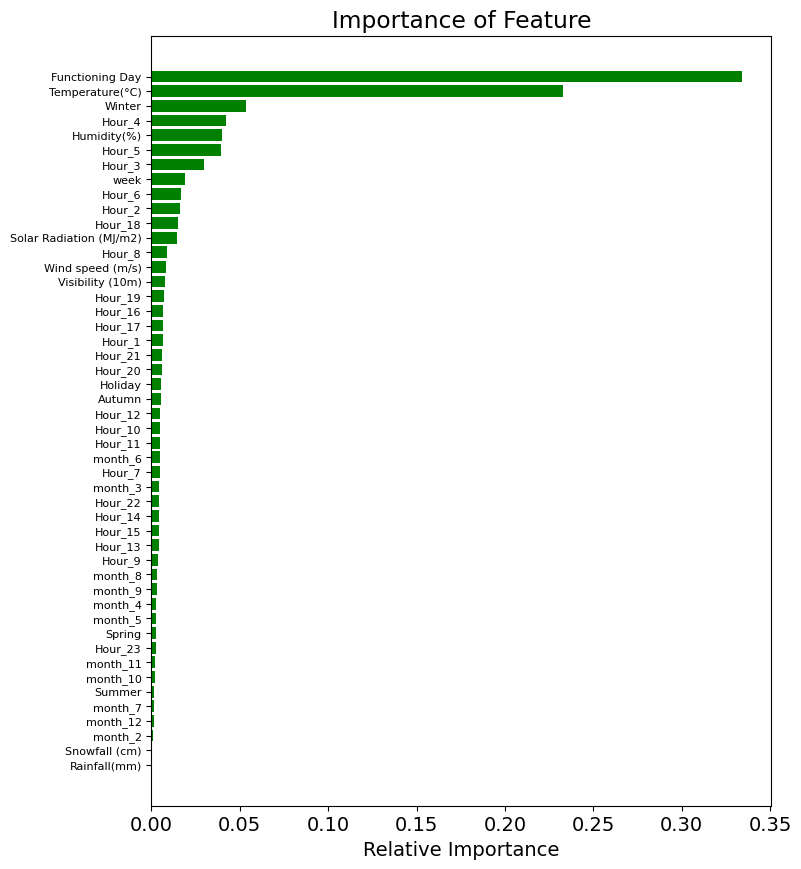

In [263]:
#Plotting figure
plt.figure(figsize=(8,10))
plt.title('Importance of Feature')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize = 8)
plt.xlabel('Relative Importance')

plt.show()


# **Conclusion**

**EDA conclusion**

Hour of the day holds most importance among all the features for prediction of dataset.

It is observed that highest number bike rentals counts in Autumn/fall Summer Seasons and the lowest in Spring season.

We observed that the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day.

As we can see the top 5 important features of our dataset are: Season_winter, Temperature, Hour, Season_autumn, Humidity.

Peoples dont use rented bikes in no functioning day.

People tend to rent bikes when the temperature is between -5 to 25 degrees.

People tend to rent bikes when the visibility is between 300 to 1700.

**ML model conclusion:**

Considering adjusted r^2 score on test stastics we have selected Random Forest as best performing model with accuracy of 88.67%


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***